<a href="https://colab.research.google.com/github/AnkitaSingh2324/VOIS_AICTE_OCT2025_ANKITA_SINGH/blob/main/VOIS_AICTE_OCT2025_MAJORPROJECT_ANKITA_SINGH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import sys
import os
import re
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Optional display settings for nicer tables in notebooks
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 200)

# Quick environment/version check
print("Python:", sys.version.splitlines()[0])
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)

# Sanity: show current working directory
print("CWD:", os.getcwd())

Python: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
pandas: 2.2.2
numpy: 2.0.2
matplotlib: 3.10.0
CWD: /content


In [ ]:
df = pd.read_excel('/content/Netflix Dataset.xlsx')

In [ ]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,0.03,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19:00,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59:00,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.shape

(7789, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [ ]:
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [ ]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description'], dtype='object')

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape


(7787, 11)

In [ ]:
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [ ]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.columns

Index(['show_id', 'category', 'title', 'director', 'cast', 'country', 'release_date', 'rating', 'duration', 'type', 'description'], dtype='object')

In [ ]:
df = df.dropna(subset=['release_date', 'rating'])

In [ ]:
df['country'] = df['country'].fillna('Unknown')

In [ ]:
df.isnull().sum()

,0
show_id,0
category,0
title,0
director,2375
cast,718
country,0
release_date,0
rating,0
duration,0
type,0


In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [ ]:
df['release_year'] = df['release_date'].dt.year

In [ ]:
df[['title', 'release_date', 'release_year']].head()

,title,release_date,release_year
0,0.03,2020-08-14,2020.0
1,07:19:00,2016-12-23,2016.0
2,23:59:00,2018-12-20,2018.0
3,9,2017-11-16,2017.0
4,21,2020-01-01,2020.0


In [ ]:
df['duration'] = df['duration'].fillna('').astype(str)

In [ ]:
df['duration_num'] = df['duration'].str.extract(r'(\d+)', expand=False).astype(float)

In [ ]:
df['duration_unit'] = (df['duration']
                       .str.extract(r'([A-Za-z]+)', expand=False)
                                              .str.lower()
                                                                     .fillna(''))


In [ ]:
df[['title', 'duration', 'duration_num', 'duration_unit']].head(10)

,title,duration,duration_num,duration_unit
0,0.03,4 Seasons,4.0,seasons
1,07:19:00,93 min,93.0,min
2,23:59:00,78 min,78.0,min
3,9,80 min,80.0,min
4,21,123 min,123.0,min
5,46,1 Season,1.0,season
6,122,95 min,95.0,min
7,187,119 min,119.0,min
8,706,118 min,118.0,min
9,1920,143 min,143.0,min


In [ ]:
df['category'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [ ]:
df['category'] = df['category'].str.strip().str.title()

In [ ]:
df['category'].unique()

array(['Tv Show', 'Movie'], dtype=object)

In [ ]:
df['type'].head(10)


,type
0,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,"Dramas, International Movies"
2,"Horror Movies, International Movies"
3,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Dramas
5,"International TV Shows, TV Dramas, TV Mysteries"
6,"Horror Movies, International Movies"
7,Dramas
8,"Horror Movies, International Movies"
9,"Horror Movies, International Movies, Thrillers"


In [ ]:
df['genres'] = df['type'].str.split(',')

In [ ]:
df['genres'] = df['genres'].apply(lambda x: [g.strip() for g in x] if isinstance(x, list) else [])

In [ ]:
df[['title', 'type', 'genres']].head()

,title,type,genres
0,0.03,"International TV Shows, TV Dramas, TV Sci-Fi &...","[International TV Shows, TV Dramas, TV Sci-Fi ..."
1,07:19:00,"Dramas, International Movies","[Dramas, International Movies]"
2,23:59:00,"Horror Movies, International Movies","[Horror Movies, International Movies]"
3,9,"Action & Adventure, Independent Movies, Sci-Fi...","[Action & Adventure, Independent Movies, Sci-F..."
4,21,Dramas,[Dramas]


In [ ]:
df.columns
df.head(10)

,show_id,category,title,director,cast,country,release_date,rating,duration,type,description,release_year,duration_num,duration_unit,genres
0,s1,Tv Show,0.03,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,4.0,seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
1,s2,Movie,07:19:00,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,93.0,min,"[Dramas, International Movies]"
2,s3,Movie,23:59:00,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,78.0,min,"[Horror Movies, International Movies]"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,80.0,min,"[Action & Adventure, Independent Movies, Sci-F..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,123.0,min,[Dramas]
5,s6,Tv Show,46,Serdar Akar,"Erdal BeÅŸikÃ§ioÄŸlu, Yasemin Allen, Melis Bir...",Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017.0,1.0,season,"[International TV Shows, TV Dramas, TV Mysteries]"
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020.0,95.0,min,"[Horror Movies, International Movies]"
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,2019.0,119.0,min,[Dramas]
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019.0,118.0,min,"[Horror Movies, International Movies]"
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017.0,143.0,min,"[Horror Movies, International Movies, Thrillers]"


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
type_trend = df.groupby(['release_year', 'category']).size().reset_index(name='count')

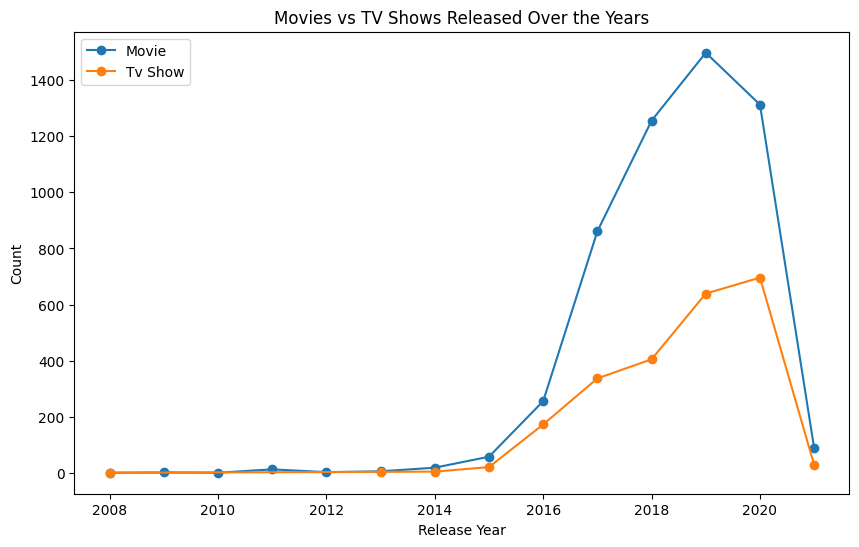

In [ ]:
plt.figure(figsize=(10,6))
for t in type_trend['category'].unique():
    data = type_trend[type_trend['category'] == t]
    plt.plot(data['release_year'], data['count'], marker='o', label=t)
plt.title("Movies vs TV Shows Released Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.legend()
plt.show()

In [ ]:
# Most common rating for Movies
common_movie_rating = df[df['category'] == 'Movie']['rating'].mode()[0]
print("Most common rating for Movies:", common_movie_rating)

Most common rating for Movies: TV-MA


In [36]:
# Most common rating for TV Shows
# Inspect unique values in 'category' to ensure correct filtering
print(df['category'].unique())
tv_show_df = df[df['category'] == 'Tv Show'] # Use 'Tv Show' based on previous output
if not tv_show_df.empty:
    common_tv_rating = tv_show_df['rating'].mode()
    if not common_tv_rating.empty:
        print("Most common rating for TV Shows:", common_tv_rating[0])
    else:
        print("No rating found for TV Shows.")
else:
    print("No TV Shows found in the data.")

['Tv Show' 'Movie']
Most common rating for TV Shows: TV-MA


In [37]:
import matplotlib.pyplot as plt

In [38]:
# Rating distribution for Movies
movie_ratings = df[df['category'] == 'Movie']['rating'].value_counts()


In [41]:
# Rating distribution for TV Shows
tv_ratings = df[df['category'] == 'Tv Show']['rating'].value_counts()

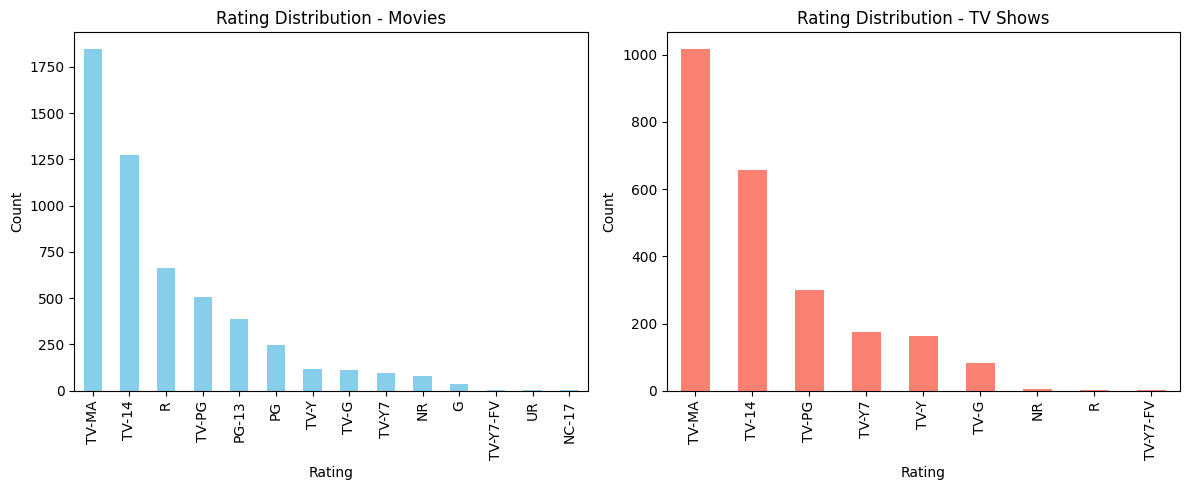

In [43]:
# Plotting
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
movie_ratings.plot(kind='bar', color='skyblue')
plt.title("Rating Distribution - Movies")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.subplot(1,2,2)
tv_ratings.plot(kind='bar', color='salmon')
plt.title("Rating Distribution - TV Shows")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [44]:
# Split genres into separate rows
df_exploded = df.explode('genres')

In [45]:
# Count most common genres overall
top_genres = df_exploded['genres'].value_counts().head(10)
print(top_genres)

genres
International Movies        2437
Dramas                      2105
Comedies                    1471
International TV Shows      1197
Documentaries                786
Action & Adventure           721
TV Dramas                    703
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
Name: count, dtype: int64


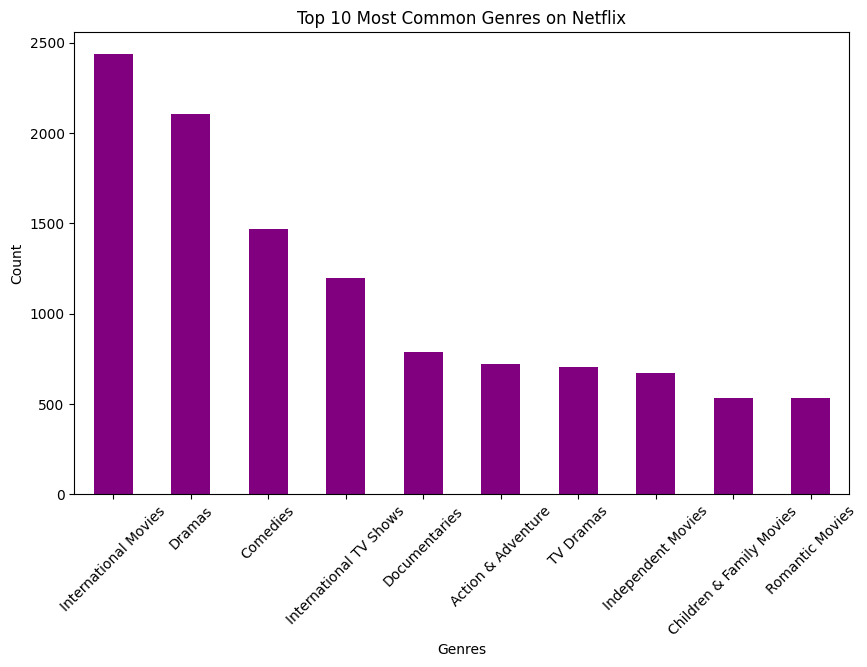

In [46]:
# Plot top 10 genres
plt.figure(figsize=(10,6))
top_genres.plot(kind='bar', color='purple')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [47]:
# Count genres by release year
genre_trends = df_exploded.groupby(['release_year', 'genres']).size().reset_index(name='count')


In [48]:
# Select top 5 genres for trend visualization
top5_genres = top_genres.index[:5]
genre_trends_top5 = genre_trends[genre_trends['genres'].isin(top5_genres)]


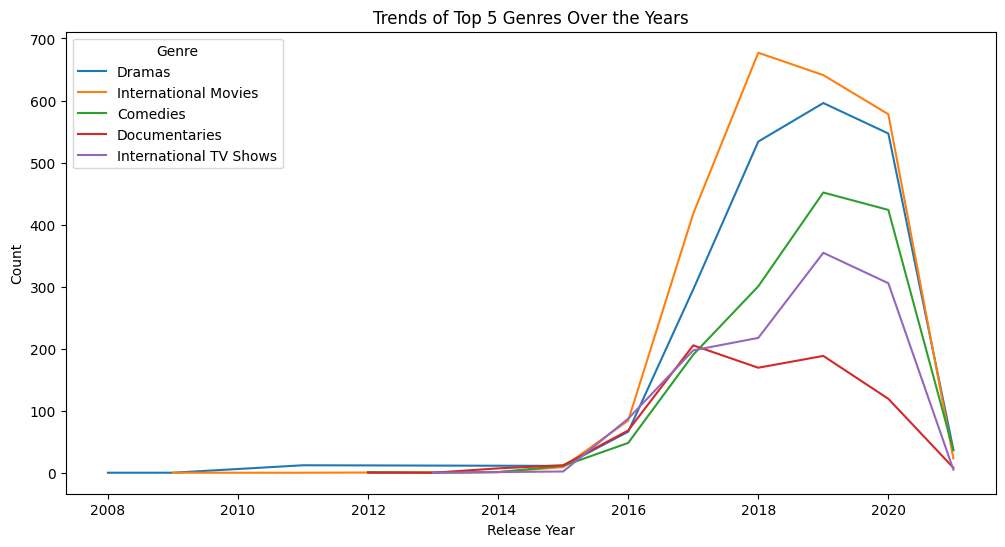

In [49]:
# Plot trends
import seaborn as sns
plt.figure(figsize=(12,6))
sns.lineplot(data=genre_trends_top5, x='release_year', y='count', hue='genres')
plt.title("Trends of Top 5 Genres Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.legend(title="Genre")
plt.show()

In [50]:
# Split countries into separate rows
df_exploded_country = df.assign(country=df['country'].str.split(', ')).explode('country')


In [51]:
# Count top 10 countries by number of titles
top_countries = df_exploded_country['country'].value_counts().head(10)
print(top_countries)


country
United States     3287
India              990
United Kingdom     721
Unknown            505
Canada             412
France             349
Japan              285
Spain              215
South Korea        212
Germany            199
Name: count, dtype: int64


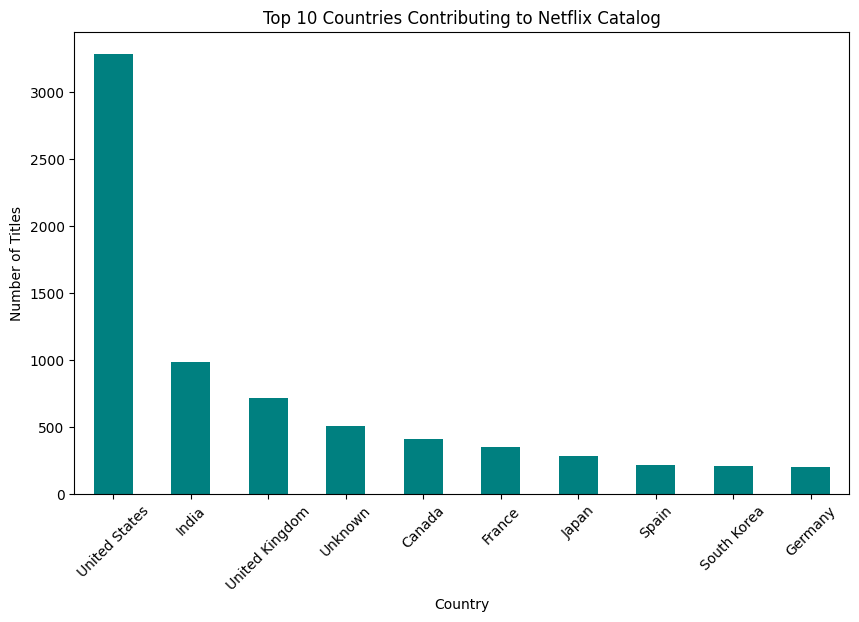

In [52]:
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='teal')
plt.title("Top 10 Countries Contributing to Netflix Catalog")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

In [53]:
# Count Movies vs TV Shows per country
country_category = df_exploded_country.groupby(['country', 'category']).size().reset_index(name='count')


In [54]:
# Select top 10 countries overall
top10_countries = top_countries.index
country_category_top10 = country_category[country_category['country'].isin(top10_countries)]


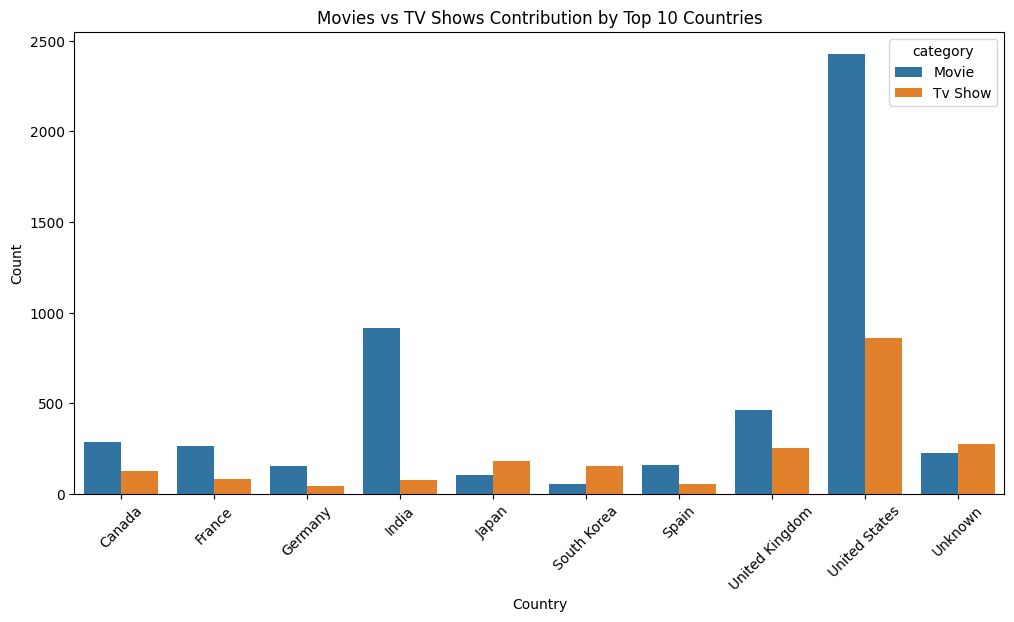

In [55]:
# Plot stacked bar chart
import seaborn as sns
plt.figure(figsize=(12,6))
sns.barplot(data=country_category_top10, x='country', y='count', hue='category')
plt.title("Movies vs TV Shows Contribution by Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()